In [1]:
import os
import sys
import itertools
import uproot
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from os.path             import expandvars
from STable.STable_tools import read_stable, split_tubeids, read_wcsim_geometry

# import ROOT
# ROOT.gROOT.LoadMacro(expandvars("$HOME/Software/fiTQun/install-Linux_x86_64-gcc_9-python_3.10.13/lib/libfiTQunLib.so"))

In [2]:
fname = "/sps/t2k/gdiazlop/STable/tuning/scattables.h5"

In [7]:
tabname = "side"
with tb.open_file(fname) as f:
    # read bins
    bins = 7*[None]
    for i in range(5): bins[i] = getattr(f.root.bins, f"bins_{i}").read()
    zPMTbins = f.root.bins.bins_zPMT.read()
    RPMTbins = f.root.bins.bins_RPMT.read()
    mPMT_PMTNobins = f.root.bins.bins_mPMT_PMTNo.read()
    if tabname == "side": bins[5] = zPMTbins
    else                : bins[5] = RPMTbins
    bins[6] = mPMT_PMTNobins

    # read table
    stable   = getattr(f.root.tables, tabname + "/stable")  .read()
    indirect = getattr(f.root.tables, tabname + "/indirect").read()

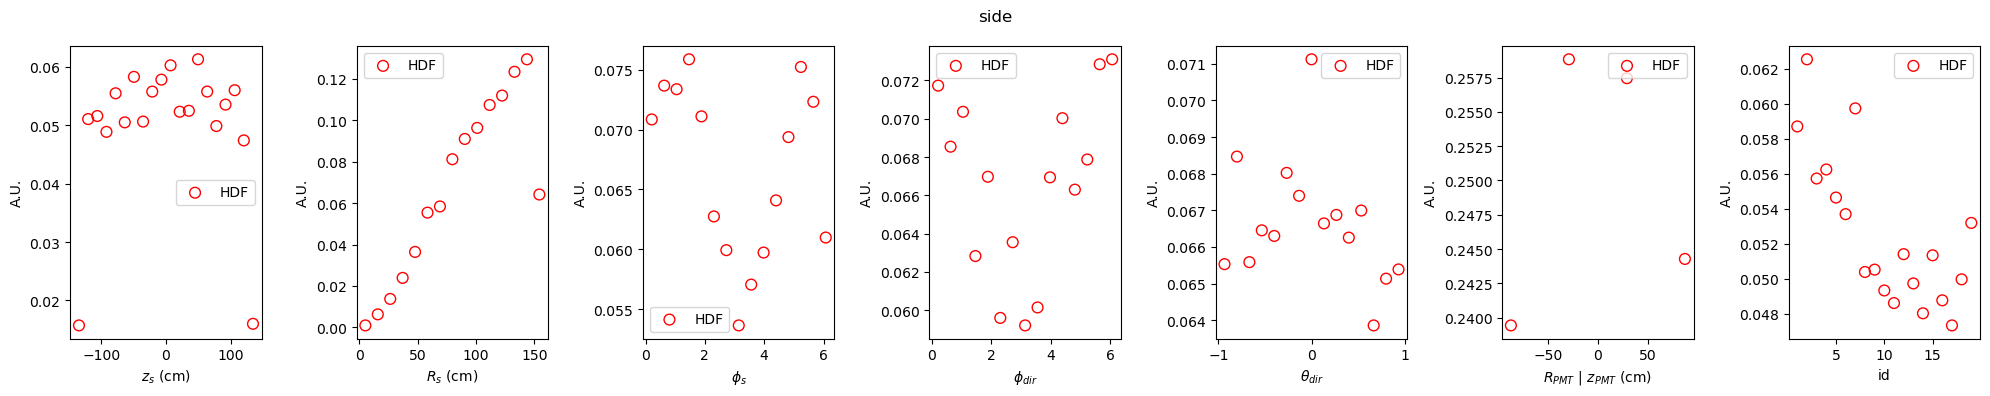

In [8]:
vars = {0:r"$z_s$ (cm)", 1:r"$R_s$ (cm)", 2:r"$\phi_s$", 3:r"$\phi_{dir}$", 4:r"$\theta_{dir}$", 5:r"$R_{PMT} ~|~ z_{PMT}$ (cm)", 6:r"id"}

plt.figure(figsize=[20, 4])
plt.suptitle(tabname)
dims = list(range(7))
for dim in dims:

    plt.subplot(1, len(dims), dim+1)

    b = bins[dim]
    x = (b[1:] + b[:-1])/2.
    proj = stable.sum(axis=tuple(np.delete(dims, dim)))
    plt.scatter(x, proj/np.sum(proj), label="HDF", edgecolor="red", s=60, c="none")

    plt.xlabel(vars[dim])
    plt.ylabel("A.U.")
    plt.legend()
    plt.tight_layout()

In [8]:
tables = read_stable(fname_root, names=["side_direct", "side_indirect"])

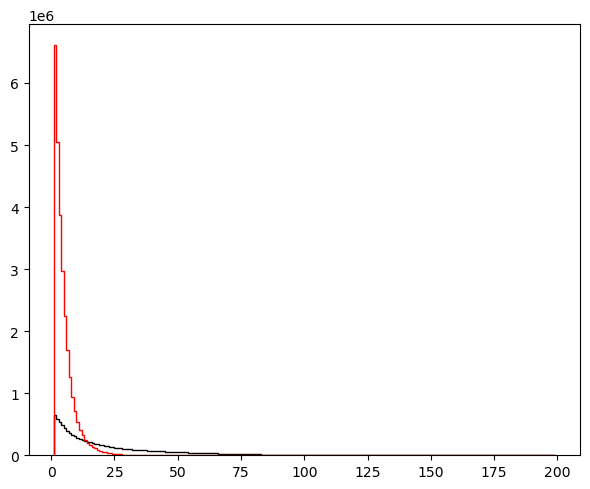

In [20]:
tab = tables["side_indirect"]

plt.figure(figsize=(6, 5))

bins = np.arange(1, 200)
plt.hist(     tab.flatten(), bins=bins, histtype="step", color="k")
plt.hist(indirect.flatten(), bins=bins, histtype="step", color="r")

plt.tight_layout()